In [1]:
# !pip install pycountry-convert

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry_convert as pc
sns.set_style('white')
plt.rcParams["figure.figsize"] = (12, 8)

In [54]:
mean_years = pd.read_csv('mean-years-of-schooling-long-run.csv', sep=';')
mean_years

,Entity,Code,Year,avg_years_of_schooling
0,Afghanistan,AFG,1870,0.01
1,Afghanistan,AFG,1875,0.01
2,Afghanistan,AFG,1880,0.01
3,Afghanistan,AFG,1885,0.01
4,Afghanistan,AFG,1890,0.01
...,...,...,...,...
7758,Zimbabwe,ZWE,2013,8.00
7759,Zimbabwe,ZWE,2014,8.20
7760,Zimbabwe,ZWE,2015,8.20
7761,Zimbabwe,ZWE,2016,8.20


In [55]:
ad_mort = pd.read_csv('Adult mortality.csv', skiprows=1)
#ad_mort = ad_mort[(ad_mort['Year'] >= 2013) & (ad_mort['Year'] <2017)]
ad_mort

,Country,Year,Both sexes,Male,Female
0,Afghanistan,2016,245,272,216
1,Afghanistan,2015,233,254,210
2,Afghanistan,2014,234,254,213
3,Afghanistan,2013,235,254,215
4,Afghanistan,2012,242,262,221
...,...,...,...,...,...
3106,Zimbabwe,2004,694,725,670
3107,Zimbabwe,2003,697,728,671
3108,Zimbabwe,2002,695,728,667
3109,Zimbabwe,2001,688,723,656


In [56]:
mat_mort = pd.read_csv('Maternal mortality.csv')
mat_mort

,Country,Year,Maternal mortality ratio (per 100 000 live births),Number of maternal deaths
0,Afghanistan,2017,638 [ 427 - 1 010 ],7 700 [ 5 100 - 12 000 ]
1,Afghanistan,2016,673 [ 457 - 1 040 ],8 100 [ 5 500 - 12 000 ]
2,Afghanistan,2015,701 [ 501 - 1 020 ],8 400 [ 6 000 - 12 000 ]
3,Afghanistan,2014,786 [ 592 - 1 080 ],9 300 [ 7 000 - 13 000 ]
4,Afghanistan,2013,810 [ 617 - 1 080 ],9 600 [ 7 300 - 13 000 ]
...,...,...,...,...
3289,Zimbabwe,2004,686 [ 597 - 784 ],2 800 [ 2 400 - 3 100 ]
3290,Zimbabwe,2003,680 [ 590 - 779 ],2 700 [ 2 300 - 3 100 ]
3291,Zimbabwe,2002,666 [ 577 - 766 ],2 600 [ 2 200 - 3 000 ]
3292,Zimbabwe,2001,629 [ 544 - 723 ],2 400 [ 2 100 - 2 800 ]


In [57]:
prob_dth = pd.read_csv('Probability of dying per 1000 live births.csv',skiprows=1)
prob_dth.rename(columns={' Both sexes':'inf_both_sexes',
                         ' Male':'inf_male',
                         ' Female':'inf_female',
                         ' Both sexes.1':'neonat_both_sexes',
                         ' Both sexes.2':'u5_both_sexes',
                         ' Male.1':'u5_male',
                         ' Female.1':'u5_female'}, inplace=True)
prob_dth = prob_dth[(prob_dth['Year'] >= 2013) & (prob_dth['Year'] <2017)]
prob_dth

,Country,Year,inf_both_sexes,inf_male,inf_female,neonat_both_sexes,u5_both_sexes,u5_male,u5_female
2,Afghanistan,2016,51.2,54.5,47.7,39.3,67.5,70.9,63.7
3,Afghanistan,2015,53.1,56.5,49.6,40.5,70.4,73.8,66.7
4,Afghanistan,2014,55.1,58.6,51.5,41.9,73.6,77.0,69.9
5,Afghanistan,2013,57.3,60.8,53.6,43.3,76.9,80.5,73.2
8,Albania,2016,8.2,8.9,7.6,6.2,9.3,9.9,8.6
...,...,...,...,...,...,...,...,...,...
1157,Zambia,2013,47.8,52.0,43.4,25.3,70.7,75.9,65.1
1160,Zimbabwe,2016,36.3,40.4,32.0,22.3,50.4,55.0,45.5
1161,Zimbabwe,2015,38.5,42.8,34.0,23.1,54.3,59.2,49.2
1162,Zimbabwe,2014,40.4,44.9,35.6,24.2,57.5,62.5,52.3


In [58]:
num_dth = pd.read_csv('Number of deaths (thousands).csv')
num_dth

,Unnamed: 0,Unnamed: 1,Number of under-five deaths (thousands),Number of under-five deaths (thousands).1,Number of under-five deaths (thousands).2,Number of infant deaths (thousands),Number of infant deaths (thousands).1,Number of infant deaths (thousands).2,Number of neonatal deaths (thousands)
0,Country,Year,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes
1,Afghanistan,2018,74278,40312,33966,57182,31394,25788,44725
2,Afghanistan,2017,76877,41631,35246,58846,32244,26602,45771
3,Afghanistan,2016,79770,43134,36636,60673,33222,27451,46963
4,Afghanistan,2015,82918,44733,38185,62652,34257,28395,48237
...,...,...,...,...,...,...,...,...,...
1160,Zimbabwe,2017,22519,12419,10100,16015,9010,7005,9696
1161,Zimbabwe,2016,23326,12867,10459,16693,9396,7297,10235
1162,Zimbabwe,2015,25433,14001,11432,18006,10121,7885,10815
1163,Zimbabwe,2014,27058,14866,12192,19051,10707,8344,11447


In [59]:
mean_years.rename(columns={'Entity':'Country'},inplace=True)

In [61]:
mean_years = mean_years[(mean_years['Year'] >= 2000) & (mean_years['Year'] < 2017)]
mean_years

,Country,Code,Year,avg_years_of_schooling
34,Afghanistan,AFG,2000,2.2
35,Afghanistan,AFG,2001,2.2
36,Afghanistan,AFG,2002,2.3
37,Afghanistan,AFG,2003,2.4
38,Afghanistan,AFG,2004,2.5
...,...,...,...,...
7757,Zimbabwe,ZWE,2012,7.9
7758,Zimbabwe,ZWE,2013,8.0
7759,Zimbabwe,ZWE,2014,8.2
7760,Zimbabwe,ZWE,2015,8.2


In [62]:
merge_df = pd.merge(mean_years,ad_mort, on=['Country','Year'])
#merge_df = pd.merge(merge_df,prob_dth, on=['Country','Year'])
merge_df

,Country,Code,Year,avg_years_of_schooling,Both sexes,Male,Female
0,Afghanistan,AFG,2000,2.2,316,340,290
1,Afghanistan,AFG,2001,2.2,307,330,283
2,Afghanistan,AFG,2002,2.3,292,309,275
3,Afghanistan,AFG,2003,2.4,286,304,268
4,Afghanistan,AFG,2004,2.5,282,300,263
...,...,...,...,...,...,...,...
2691,Zimbabwe,ZWE,2012,7.9,407,464,357
2692,Zimbabwe,ZWE,2013,8.0,383,437,336
2693,Zimbabwe,ZWE,2014,8.2,358,395,328
2694,Zimbabwe,ZWE,2015,8.2,346,383,314


In [63]:
def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

In [64]:
merge_df['Continent'] = merge_df['Country'].apply(lambda row: country_to_continent(row))

In [13]:
final_df = merge_df.sort_values(['Country','Year'], ascending=[True,False]).reset_index()
final_df.drop(columns='index', inplace=True)
final_df

,Country,Code,Year,avg_years_of_schooling,Both sexes,Male,Female,inf_both_sexes,inf_male,inf_female,neonat_both_sexes,u5_both_sexes,u5_male,u5_female,Continent
0,Afghanistan,AFG,2016,3.6,245,272,216,51.2,54.5,47.7,39.3,67.5,70.9,63.7,Asia
1,Afghanistan,AFG,2015,3.6,233,254,210,53.1,56.5,49.6,40.5,70.4,73.8,66.7,Asia
2,Afghanistan,AFG,2014,3.5,234,254,213,55.1,58.6,51.5,41.9,73.6,77.0,69.9,Asia
3,Afghanistan,AFG,2013,3.5,235,254,215,57.3,60.8,53.6,43.3,76.9,80.5,73.2,Asia
4,Albania,ALB,2016,10.0,96,122,71,8.2,8.9,7.6,6.2,9.3,9.9,8.6,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,Zambia,ZMB,2013,6.8,311,347,277,47.8,52.0,43.4,25.3,70.7,75.9,65.1,Africa
644,Zimbabwe,ZWE,2016,8.2,334,371,303,36.3,40.4,32.0,22.3,50.4,55.0,45.5,Africa
645,Zimbabwe,ZWE,2015,8.2,346,383,314,38.5,42.8,34.0,23.1,54.3,59.2,49.2,Africa
646,Zimbabwe,ZWE,2014,8.2,358,395,328,40.4,44.9,35.6,24.2,57.5,62.5,52.3,Africa


In [14]:
final_df.rename(columns={'Year_x':'Year',
                         'Both sexes':'mort_rate_both_sexes',
                         'Male':'mort_rate_male',
                         'Female':'mort_rate_female'}, inplace=True)

In [65]:
final_df

,Continent,Country,Code,Year,avg_years_of_schooling,mort_rate_both_sexes,mort_rate_male,mort_rate_female,inf_both_sexes,inf_male,inf_female,neonat_both_sexes,u5_both_sexes,u5_male,u5_female
0,Asia,Afghanistan,AFG,2016,3.6,245,272,216,51.2,54.5,47.7,39.3,67.5,70.9,63.7
1,Asia,Afghanistan,AFG,2015,3.6,233,254,210,53.1,56.5,49.6,40.5,70.4,73.8,66.7
2,Asia,Afghanistan,AFG,2014,3.5,234,254,213,55.1,58.6,51.5,41.9,73.6,77.0,69.9
3,Asia,Afghanistan,AFG,2013,3.5,235,254,215,57.3,60.8,53.6,43.3,76.9,80.5,73.2
4,Europe,Albania,ALB,2016,10.0,96,122,71,8.2,8.9,7.6,6.2,9.3,9.9,8.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,Africa,Zambia,ZMB,2013,6.8,311,347,277,47.8,52.0,43.4,25.3,70.7,75.9,65.1
644,Africa,Zimbabwe,ZWE,2016,8.2,334,371,303,36.3,40.4,32.0,22.3,50.4,55.0,45.5
645,Africa,Zimbabwe,ZWE,2015,8.2,346,383,314,38.5,42.8,34.0,23.1,54.3,59.2,49.2
646,Africa,Zimbabwe,ZWE,2014,8.2,358,395,328,40.4,44.9,35.6,24.2,57.5,62.5,52.3


In [16]:
final_df = final_df[['Continent'] + [ col for col in final_df.columns if col != 'Continent' ]]
final_df

,Continent,Country,Code,Year,avg_years_of_schooling,mort_rate_both_sexes,mort_rate_male,mort_rate_female,inf_both_sexes,inf_male,inf_female,neonat_both_sexes,u5_both_sexes,u5_male,u5_female
0,Asia,Afghanistan,AFG,2016,3.6,245,272,216,51.2,54.5,47.7,39.3,67.5,70.9,63.7
1,Asia,Afghanistan,AFG,2015,3.6,233,254,210,53.1,56.5,49.6,40.5,70.4,73.8,66.7
2,Asia,Afghanistan,AFG,2014,3.5,234,254,213,55.1,58.6,51.5,41.9,73.6,77.0,69.9
3,Asia,Afghanistan,AFG,2013,3.5,235,254,215,57.3,60.8,53.6,43.3,76.9,80.5,73.2
4,Europe,Albania,ALB,2016,10.0,96,122,71,8.2,8.9,7.6,6.2,9.3,9.9,8.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,Africa,Zambia,ZMB,2013,6.8,311,347,277,47.8,52.0,43.4,25.3,70.7,75.9,65.1
644,Africa,Zimbabwe,ZWE,2016,8.2,334,371,303,36.3,40.4,32.0,22.3,50.4,55.0,45.5
645,Africa,Zimbabwe,ZWE,2015,8.2,346,383,314,38.5,42.8,34.0,23.1,54.3,59.2,49.2
646,Africa,Zimbabwe,ZWE,2014,8.2,358,395,328,40.4,44.9,35.6,24.2,57.5,62.5,52.3


In [17]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Continent               648 non-null    object 
 1   Country                 648 non-null    object 
 2   Code                    648 non-null    object 
 3   Year                    648 non-null    int64  
 4   avg_years_of_schooling  648 non-null    float64
 5   mort_rate_both_sexes    648 non-null    int64  
 6   mort_rate_male          648 non-null    int64  
 7   mort_rate_female        648 non-null    int64  
 8   inf_both_sexes          648 non-null    float64
 9   inf_male                648 non-null    float64
 10  inf_female              648 non-null    float64
 11  neonat_both_sexes       648 non-null    float64
 12  u5_both_sexes           648 non-null    float64
 13  u5_male                 648 non-null    float64
 14  u5_female               648 non-null    fl

In [67]:
merge_df

,Country,Code,Year,avg_years_of_schooling,Both sexes,Male,Female,Continent
0,Afghanistan,AFG,2000,2.2,316,340,290,Asia
1,Afghanistan,AFG,2001,2.2,307,330,283,Asia
2,Afghanistan,AFG,2002,2.3,292,309,275,Asia
3,Afghanistan,AFG,2003,2.4,286,304,268,Asia
4,Afghanistan,AFG,2004,2.5,282,300,263,Asia
...,...,...,...,...,...,...,...,...
2691,Zimbabwe,ZWE,2012,7.9,407,464,357,Africa
2692,Zimbabwe,ZWE,2013,8.0,383,437,336,Africa
2693,Zimbabwe,ZWE,2014,8.2,358,395,328,Africa
2694,Zimbabwe,ZWE,2015,8.2,346,383,314,Africa


In [69]:
import plotly.express as px
px.scatter(merge_df, x='avg_years_of_schooling', y='Both sexes',
           size='Both sexes', size_max=30, color='Continent', animation_frame="Year", animation_group="Country",
           template='simple_white', width=1000, height=700,hover_name='Country')

In [102]:
import plotly.express as px

px.line(merge_df.groupby(['Year','Continent'], as_index=False)['Both sexes','avg_years_of_schooling'].mean(), y='Both sexes',x='Year',template='simple_white',
        color='Continent')

C:\Users\oludo\AppData\Local\Temp\ipykernel_27216\3413100836.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [92]:
merge_df.groupby(['Year','Continent'], as_index=False)['Both sexes','avg_years_of_schooling'].mean()

C:\Users\oludo\AppData\Local\Temp\ipykernel_27216\2552727673.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Year,Continent,Both sexes,avg_years_of_schooling
0,2000,Africa,358.386364,4.031818
1,2000,Asia,167.472222,7.166667
2,2000,Europe,126.764706,9.879412
3,2000,North America,175.315789,7.389474
4,2000,Oceania,181.625000,8.212500
...,...,...,...,...
97,2016,Asia,131.025641,8.715385
98,2016,Europe,89.000000,11.802857
99,2016,North America,142.000000,9.000000
100,2016,Oceania,139.111111,9.155556


In [19]:
final_df.to_csv('Complete_mortality_y_of_schooling.csv', index=False)

In [20]:
war_dataset = pd.read_csv('war-dataset.csv')

In [21]:
war_dataset = war_dataset.drop(['Code'], axis = 1)
war_dataset 

,Entity,Year,Deaths in all state-based conflict types
0,Africa,1946,0.0
1,Africa,1947,9566.0
2,Africa,1948,0.0
3,Africa,1949,0.0
4,Africa,1950,0.0
...,...,...,...
445,World,2016,87300.0
446,World,2017,67885.0
447,World,2018,54914.0
448,World,2019,51244.0


In [22]:
war_dataset = war_dataset[(war_dataset.Year < 2017) & (war_dataset.Year >= 2013)]

In [23]:
war_dataset

,Entity,Year,Deaths in all state-based conflict types
67,Africa,2013,7169.0
68,Africa,2014,10151.0
69,Africa,2015,10189.0
70,Africa,2016,9864.0
142,Americas,2013,178.0
143,Americas,2014,250.0
144,Americas,2015,199.0
145,Americas,2016,147.0
217,Asia & Oceania,2013,11293.0
218,Asia & Oceania,2014,16598.0


In [24]:
war_dataset_2013 = war_dataset[war_dataset.Year == 2013]
war_dataset_2013

,Entity,Year,Deaths in all state-based conflict types
67,Africa,2013,7169.0
142,Americas,2013,178.0
217,Asia & Oceania,2013,11293.0
292,Europe,2013,321.0
367,Middle East,2013,73836.0
442,World,2013,92797.0


C:\Users\oludo\AppData\Local\Temp\ipykernel_27216\1675167427.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

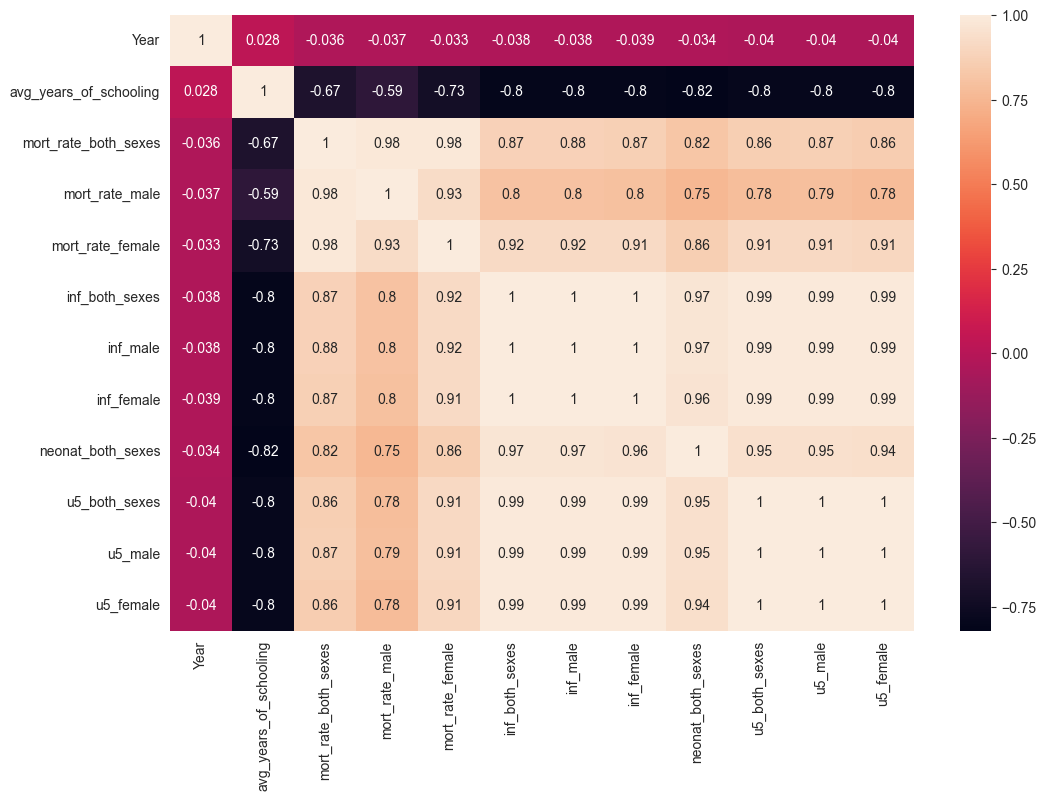

In [26]:
sns.heatmap(final_df.corr(), annot=True)

In [29]:
alc_con = pd.read_csv('alcohol-consumption-vs-gdp-per-capita.csv')
alc_con = alc_con[(alc_con['Year'] >= 2013) & (alc_con['Year'] < 2017)]
alc_con.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1206 entries, 0 to 57083
Data columns (total 7 columns):
 #   Column                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                --------------  -----  
 0   Entity                                                                                                1206 non-null   object 
 1   Code                                                                                                  1000 non-null   object 
 2   Year                                                                                                  1206 non-null   int64  
 3   Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)  235 non-null    float64
 4   GDP per capita, PPP (constant 2017 international $)                                                   

In [40]:
econ_free = pd.read_csv('efw_cc.csv')
econ_free = econ_free[(econ_free['year'] >= 2013) & (econ_free['year'] < 2017)]
econ_free.drop(columns=['2e_integrity_legal_system','1b_transfers','rank','quartile'], inplace=True)
econ_free.dropna(inplace=True)

In [41]:
econ_free

,year,ISO_code,countries,ECONOMIC FREEDOM,1a_government_consumption,1c_gov_enterprises,1d_top_marg_tax_rate,1_size_government,2a_judicial_independence,2b_impartial_courts,...,3_sound_money,4a_tariffs,4b_regulatory_trade_barriers,4c_black_market,4d_control_movement_capital_ppl,4_trade,5a_credit_market_reg,5b_labor_market_reg,5c_business_reg,5_regulation
0,2016,ALB,Albania,7.54,8.232353,8.0,8.0,7.935564,2.668222,3.145462,...,9.553657,8.963556,7.489905,10.00000,6.406138,8.214900,7.098562,6.916278,6.705863,6.906901
1,2016,DZA,Algeria,4.99,2.150000,0.0,4.5,3.616782,4.186704,4.327113,...,7.253894,6.872533,2.481294,5.56391,1.590362,4.127025,5.100509,5.029513,5.676956,5.268992
2,2016,AGO,Angola,5.17,7.600000,0.0,9.5,6.496685,1.843129,1.974566,...,5.606605,6.989244,2.024949,10.00000,2.044823,5.264754,7.064905,4.560325,4.930271,5.518500
3,2016,ARG,Argentina,4.84,5.335294,6.0,4.0,5.346056,3.689690,2.930563,...,5.614336,6.421600,4.811105,0.00000,4.697482,3.982547,5.419820,5.151405,5.535831,5.369019
4,2016,ARM,Armenia,7.57,7.264706,8.0,5.0,7.003310,3.867379,4.197569,...,9.521940,8.547556,7.194410,10.00000,6.830998,8.143241,9.102046,6.234630,6.797530,7.378069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,2013,URY,Uruguay,7.26,6.647059,8.0,8.0,7.157480,7.690399,4.896113,...,8.955841,7.742667,6.970881,10.00000,7.524929,8.059619,7.859695,5.611237,6.565985,6.678972
643,2013,VEN,Venezuela,3.32,7.062095,0.0,6.0,4.708984,0.192062,0.637052,...,3.349761,7.513822,2.375017,0.00000,3.389397,3.319559,4.764900,2.289768,2.552251,3.202306
645,2013,YEM,"Yemen, Rep.",6.33,7.902941,6.0,9.0,7.980834,2.130664,2.324770,...,8.094687,8.440000,5.376806,10.00000,3.777667,6.898618,5.000000,7.036699,4.716384,5.584361
646,2013,ZMB,Zambia,6.95,6.200000,4.0,5.5,6.425000,4.522343,4.781929,...,8.769260,6.861067,4.186663,10.00000,8.731760,7.444872,7.212462,6.234145,6.304957,6.583855


In [43]:
cur_h_exp = pd.read_csv('current health expenditure.csv', on_bad_lines='skip')
cur_h_exp

,Series Name,Series Code,Country Name,Country Code,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017]
0,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,Afghanistan,AFG,8.80594063,9.52887058,10.10534763,11.81856155,12.62081718
1,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,Africa Eastern and Southern,AFE,6.56559265262662,6.15198545089006,6.48203006270427,6.39037112423753,6.31742422644412
2,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,Africa Western and Central,AFW,3.61916261695515,3.60654015796955,3.83262516470299,3.81124865729609,3.78962441439322
3,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,Albania,ALB,5.38561106,5.50347328,4.89631176,4.91601658,5.01263571
4,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,Algeria,DZA,6.03576279,6.54721403,6.9784894,6.60749578,6.27938414
...,...,...,...,...,...,...,...,...,...
798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
801,Data from database: Health Nutrition and Popul...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
